In [1]:
# Importing the necessary files
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
# This helps that charts appear in the notebook
%matplotlib inline 

In [2]:
# Import and show dataframe created during the lecture
# You can download it from https://drive.google.com/open?id=1Y2_MD74jLCytyjlFnWjMHRbgWNxNYBtv
df = pd.read_csv('city_populations_updated.csv')
df

,city,continent,year,population
0,Agra,Asia,1575,200.0
1,Agra,Asia,1576,212.0
2,Agra,Asia,1577,224.0
3,Agra,Asia,1578,236.0
4,Agra,Asia,1579,248.0
...,...,...,...,...
6247,Vijayanagar,Asia,1561,480.0
6248,Vijayanagar,Asia,1562,480.0
6249,Vijayanagar,Asia,1563,480.0
6250,Vijayanagar,Asia,1564,480.0


In [3]:
## Create colours dictionary
colors = dict(zip(
    ['Europe', 'Asia', 'South America', 'North America', 'Africa'],
    ['#adb0ff', '#90d595','#aafbff', '#f7bb5f', '#eafb50']))
group_lk = df.set_index('city')['continent'].to_dict()

In [4]:
## I updated the draw_barcart function to take on a global parameter of the range of years
## You can modify the .tail(10) of the second line of the function to get more cities
## You can only show 12 cities per year since there are only 12 entries per year!!
rangeofyears = False
def draw_barchart(year):
    global rangeofyears
    dff = df[df['year'].eq(year)].sort_values(by='population', ascending=True).tail(5)
    ax.clear()
    ax.barh(dff['city'], dff['population'], color=[colors[group_lk[x]] for x in dff['city']])
    dx = dff['population'].max() / 200
    for i, (value, name) in enumerate(zip(dff['population'], dff['city'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    if rangeofyears:
        ax.text(0, 1.12, 'The most populous cities in the world '+rangeofyears,
            transform=ax.transAxes, size=24, weight=600, ha='left') 
    else:    
        ax.text(0, 1.12, 'The most populous cities in the world '+str(year),
                transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)

In [ ]:
# if you get the error message below, run this cell
# "Animation size has reached 20997590 bytes, exceeding the limit of 20971520.0. 
# If you're sure you want a larger animation embedded, set the 
#animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped."

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

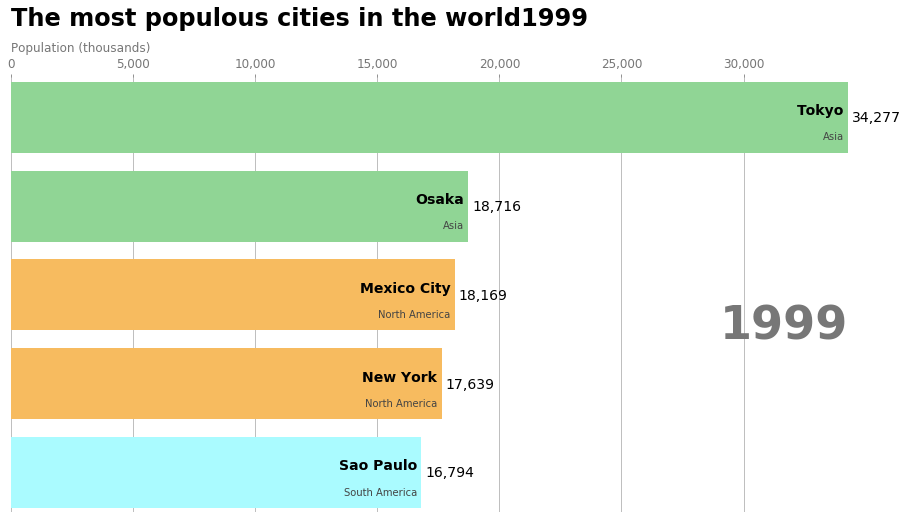

In [5]:
# Draw the bar chart for a given year
## Since there is no "rangeofyears" yet, it will show only the current year in the title
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(1999)

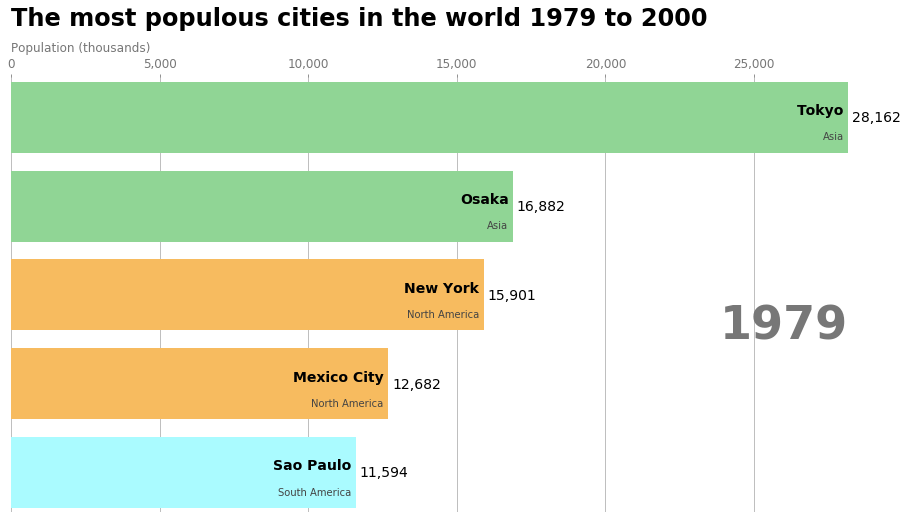

In [6]:
## Now the user inputs the first and last year, ans "rangeofyears" is created
firstyear = 1979
lastyear = 2000

rangeofyears = str(firstyear)+' to '+str(lastyear)
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(firstyear,lastyear))
HTML(animator.to_jshtml()) 

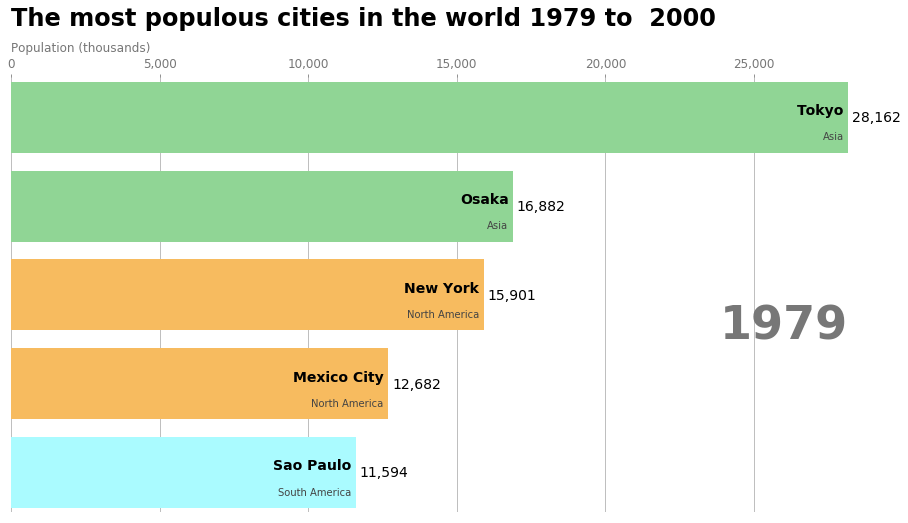

In [7]:
## You can put an extra parameter called "step" to skip years
firstyear = 1979
lastyear = 2000
step = 2

rangeofyears = str(firstyear)+' to  '+str(lastyear)
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(firstyear,lastyear,step))
HTML(animator.to_jshtml()) 

If you run this code in another IDE or save the HTML figure as an mp4, you can get rid of the second plot.

If you increase the size of the buffer, you can get the animation to run from 1500 to 2010